# Data Science Test Widget Brain.

This assignment focuses on transshipments of a certain port. Each day, many vessels arrive in this port and are served by some stevedore(s). Four cargo types have been identified (ore, coal, oil, and petroleum), and vessels often carry a mixture of cargo types. For each unique vessel arrival (i.e. each row in the data), we would like a prediction of how much it transships (total of load & discharge activities) per cargo type. Variables of interest therefore are: discharge1, load1, discharge2, load2, discharge3, load3, discharge4 and load4. 

The data for this case is stored in ‘VesselData.csv’ and contains historical data. 

We would like you to provide us with a Jupyter notebook or Python script with the results of your endeavors, well enriched with comments elaborating on the steps taken, even if they did not lead you anywhere, and try to motivate your actions as much as possible. We would like to understand the approach you have taken and your line of thought.

Explanation of variables in the data:

| Variable | Explanation   |
|:-----|:-----|
|   eta  | Estimated time of arrival of vessel|
|  ata  | Actual time of arrival of vessel |
|atd	 |           Actual time of departure of vessel |
|vesseldwt|	    Vessel deadweight tonnage|
|vesseltype|	    Vessel type|
|discharge[x]|	Discharge amount of cargo type x|
|load[x]	  |      Load amount of cargo type x|
|stevedorenames|	(Anonymized) stevedore ID’s visited by vessel|
|hasnohamis	   | Boolean whether vessel has the HaMIS notification system|
|earliesteta|	    Estimated time of arrival of first entry to port|
|latesteta	 |   Estimated time of arrival of last entry to port (vessel can spread transshipment(s) over multiple days)|
|traveltype	  |  Travel type|
|previousportid|	ID of previous port|
|nextportid	   | ID of next port|
|isremarkable|	Boolean whether there is anything remarkable regarding the vessel|
|vesselid	  |  Vessel ID|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [2]:
df =pd.read_csv("VesselData.csv")

In [3]:
# Check missing values. Overall the data looks good.
df.isna().any().any

<bound method Series.any of eta               False
ata               False
atd               False
vesseldwt          True
vesseltype        False
discharge1        False
load1             False
discharge2        False
load2             False
discharge3        False
load3             False
discharge4        False
load4             False
stevedorenames     True
hasnohamis         True
earliesteta       False
latesteta         False
traveltype        False
previousportid    False
nextportid        False
isremarkable      False
vesselid          False
dtype: bool>

In [ ]:
# See the time period 
print(min(df["ata"]))
print(max(df["ata"]))

In [4]:
pd.unique(df['vesseltype'])

array([5, 3, 2, 4, 1], dtype=int64)

In [5]:
# Create total activities for each cargo type - they are also the prediction targets.
df["total1"] = df["discharge1"] + df["load1"]
df["total2"] = df["discharge2"] + df["load2"]
df["total3"] = df["discharge3"] + df["load3"]
df["total4"] = df["discharge4"] + df["load4"]

In [10]:
# Unique vessel ids
len(pd.unique(df['vesselid']))

3022

In [6]:
# The frequencies of the vessels during the given time period.
df_by_vesselid = df.groupby(df['vesselid']).count()
df_by_vesselid.sort_values(by="eta", ascending=False)

eta  ata  atd  vesseldwt  vesseltype  discharge1  load1  discharge2  \
vesselid                                                                        
4684       98   98   98         98          98          98     98          98   
4685       94   94   94         94          94          94     94          94   
4596       79   79   79         79          79          79     79          79   
5504       65   65   65         65          65          65     65          65   
4632       59   59   59         59          59          59     59          59   
...       ...  ...  ...        ...         ...         ...    ...         ...   
3550        1    1    1          1           1           1      1           1   
3543        1    1    1          1           1           1      1           1   
3541        1    1    1          1           1           1      1           1   
3536        1    1    1          1           1           1      1           1   
7486        1    1    1          1           1           1      1           1   

          load2  discharge3  ...  earliesteta  latesteta  traveltype  \
vesselid                     ...                                       
4684         98          98  ...           98         98          98   
4685         94          94  ...           94         94          94   
4596         79          79  ...           79         79          79   
5504         65          65  ...           65         65          65   
4632         59          59  ...           59         59          59   
...         ...         ...  ...          ...        ...         ...   
3550          1           1  ...            1          1           1   
3543          1           1  ...            1          1           1   
3541          1           1  ...            1          1           1   
3536          1           1  ...            1          1           1   
7486          1           1  ...            1          1           1   

          previousportid  nextportid  isremarkable  total1  total2  total3  \
vesselid                                                                     
4684                  98          98            98      98      98      98   
4685                  94          94            94      94      94      94   
4596                  79          79            79      79      79      79   
5504                  65          65            65      65      65      65   
4632                  59          59            59      59      59      59   
...                  ...         ...           ...     ...     ...     ...   
3550                   1           1             1       1       1       1   
3543                   1           1             1       1       1       1   
3541                   1           1             1       1       1       1   
3536                   1           1             1       1       1       1   
7486                   1           1             1       1       1       1   

          total4  
vesselid          
4684          98  
4685          94  
4596          79  
5504          65  
4632          59  
...          ...  
3550           1  
3543           1  
3541           1  
3536           1  
7486           1  

[3022 rows x 25 columns]

In [9]:
# A majority appeared only once or a few times. Only 10 vessels have appeared over 50 times.
print(sum(df_by_vesselid["eta"] == 1))
print(sum(df_by_vesselid["eta"] == 2))
print(sum(df_by_vesselid["eta"] == 3))
print(sum(df_by_vesselid["eta"] >= 50))

1650
586
280
10


In [52]:
df.dtypes

eta                object
ata                object
atd                object
vesseldwt         float64
vesseltype          int64
discharge1          int64
load1               int64
discharge2          int64
load2               int64
discharge3          int64
load3               int64
discharge4          int64
load4               int64
stevedorenames     object
hasnohamis        float64
earliesteta        object
latesteta          object
traveltype         object
previousportid      int64
nextportid          int64
isremarkable       object
vesselid            int64
total1              int64
total2              int64
total3              int64
total4              int64
eta_weekday         int64
est_duration      float64
dtype: object

In the first iteration, a linear regression model could be used.

C:\Users\Juni\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Juni\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Juni\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Juni\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


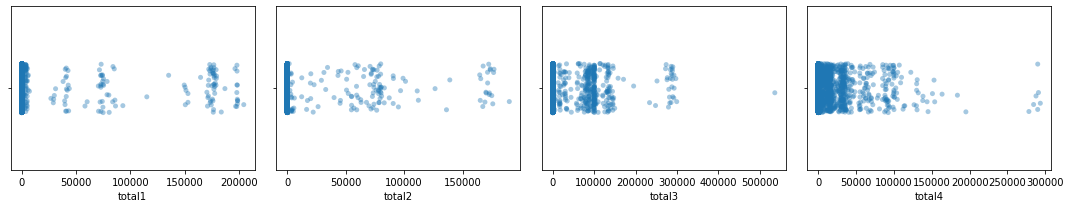

In [13]:
# Visualizing the totals distribution
df_totals = df[['total1', 'total2','total3', 'total4']]
plt.figure(figsize=(15, 3))

#function for plotting stripplots given a dataframe
def stripplot_these(df):
    for idx, name in enumerate(df.columns):
        n = idx + 1
        plt.subplot(1,4,n)
        sns.stripplot(x=name, data=df, jitter=0.15, orient= 'v', alpha=.4)
    plt.tight_layout()
    plt.show()

stripplot_these(df_totals)

In [10]:
# How all the cargo types vary over time.
df_by_date = df.groupby(df['eta'])["total1", "total2", "total3", "total4"].sum()
df_by_date.reset_index(inplace=True)
df_by_date

<ipython-input-10-0b03a00e938f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_date = df.groupby(df['eta'])["total1", "total2", "total3", "total4"].sum()


eta  total1  total2  total3  total4
0    2017-03-20 13:00:00+00       0       0       0       0
1    2017-04-05 14:00:00+00       0       0  195439       0
2    2017-04-12 14:00:00+00       0   80680       0       0
3    2017-04-15 14:00:00+00       0       0   85539       0
4    2017-04-17 14:00:00+00       0       0       0       0
..                      ...     ...     ...     ...     ...
255  2017-11-11 00:00:00+00       0   32846  314393   93828
256  2017-11-12 00:00:00+00   75199  111150  145276   82196
257  2017-11-13 00:00:00+00       0       0  100037   36885
258  2017-11-14 00:00:00+00       0       0       0       0
259  2017-11-15 00:00:00+00       0       0       0       0

[260 rows x 5 columns]

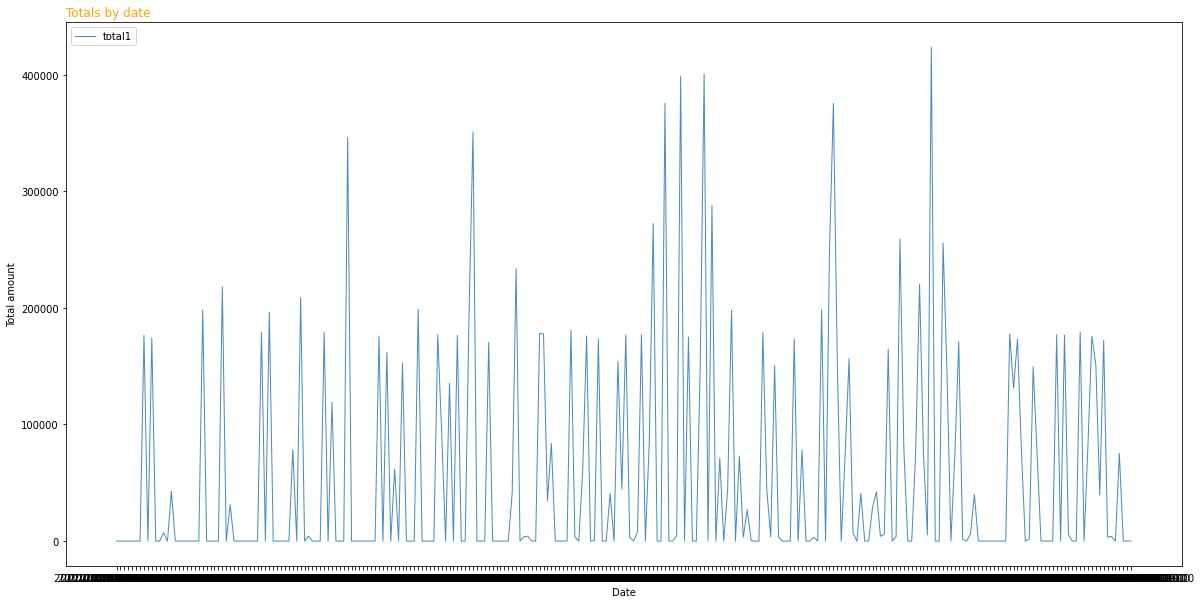

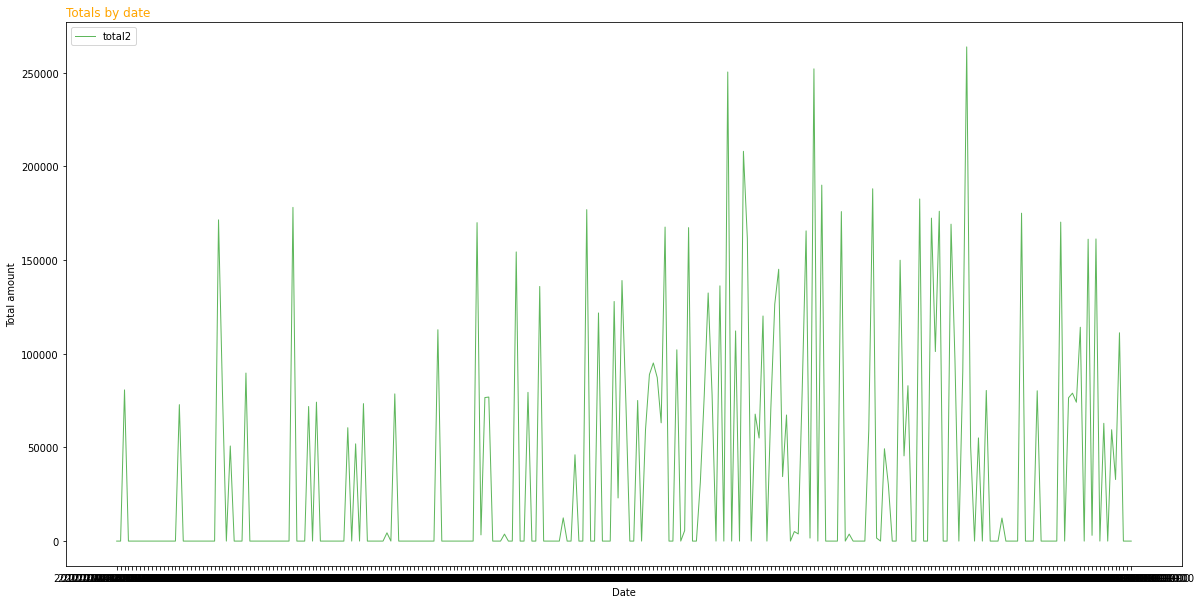

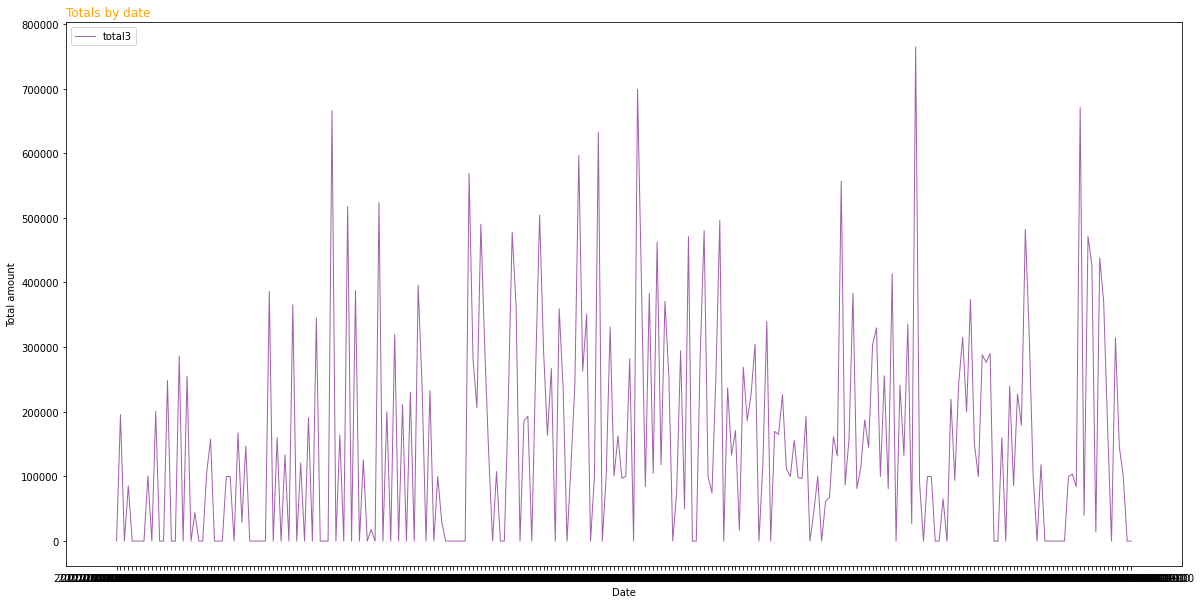

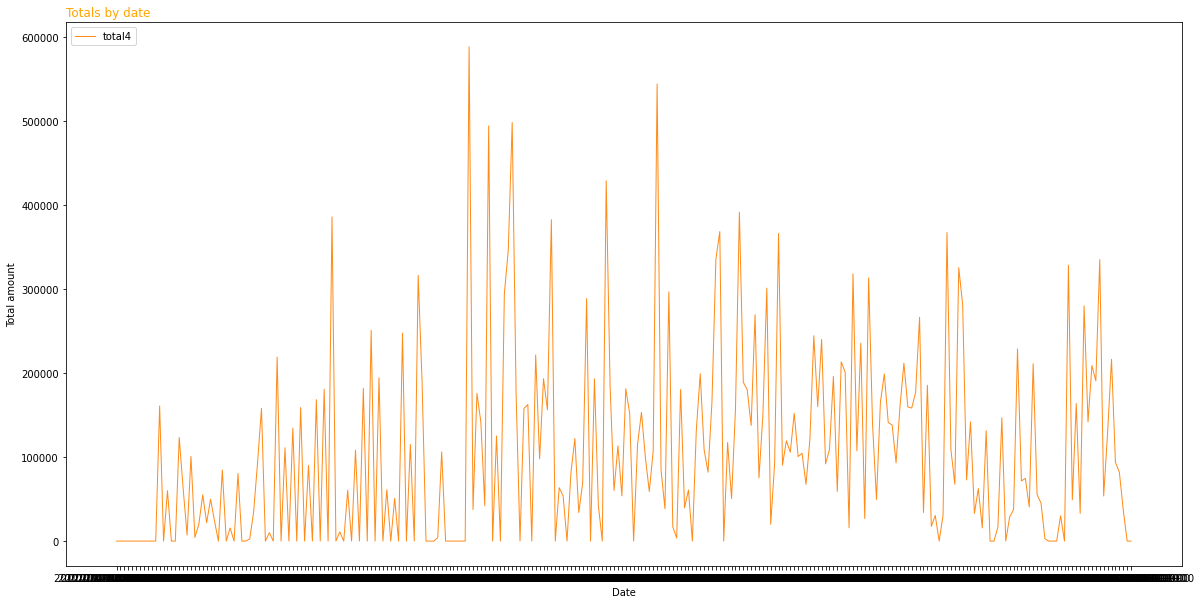

In [12]:
# Only some minor patterns over time. total1 seems to be most stable, total2 seems to be slightly increasing, while total3 and total4 seem to be almost random.
palette = plt.get_cmap('Set1')
def plot_total(column, num):
    plt.figure(figsize=(20,10))
    plt.plot(df_by_date['eta'], df_by_date[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
    plt.title("Totals by date", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Date")
    plt.ylabel("Total amount")
    plt.legend(loc=2, ncol=2)
    plt.show()
columns = ["total1", "total2", "total3", "total4"]
for i, column in enumerate(columns):
    n = i+1
    plot_total(column, n)


In [23]:
df["eta_weekday"] =  pd.to_datetime(df["eta"]).dt.weekday
df["est_duration"] = pd.to_datetime(df["latesteta"]) - pd.to_datetime(df["earliesteta"])
df["est_duration"] = df["est_duration"].astype("timedelta64[D]")


In [21]:
# This variable could be interesting but it has the same value in the entire set, thus doesn't add anything to the model. 
pd.unique(df['isremarkable'])

array(['f'], dtype=object)

In [24]:
# The actual dates aren't availabel at the time of prediction, thus the following predictors are considered to be useful in the linear regression.
df_lr = df[['eta_weekday', 'vesseldwt', 'vesseltype', 'est_duration', 'traveltype']]

In [25]:
df_lr.isna().any().any

<bound method Series.any of eta_weekday     False
vesseldwt        True
vesseltype      False
est_duration    False
traveltype      False
dtype: bool>

In [26]:
# Replace the 2 missing values in "vesseldwt" with the median value.
df_lr["vesseldwt"].fillna(df_lr.vesseldwt.median(), inplace=True) 

C:\Users\Juni\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


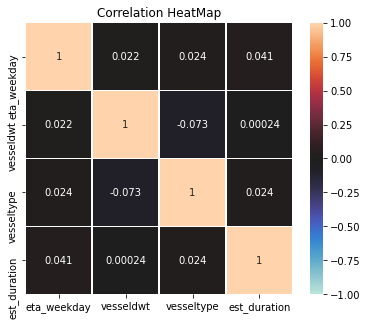

In [28]:
#Check the correlations among the variables - only insignificant.
corr = df_lr.corr(method='spearman') 

fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)

plt.title('Correlation HeatMap')
plt.show()

In [30]:
# Encode the categorical variables with dummy variables.
df_lr_dum = pd.get_dummies(df_lr, columns=["eta_weekday", "vesseltype", 'traveltype'], drop_first=True)

In [34]:
df_lr_dum

vesseldwt  est_duration  eta_weekday_1  eta_weekday_2  eta_weekday_3  \
0      109290.0           0.0              1              0              0   
1       67170.0           0.0              0              0              0   
2       67737.0           0.0              0              0              0   
3       43600.0           0.0              0              0              0   
4        9231.0           0.0              0              0              0   
...         ...           ...            ...            ...            ...   
8203     9587.0           1.0              0              0              0   
8204     9654.0           1.0              0              0              0   
8205     4726.0           3.0              0              1              0   
8206    13320.0           0.0              0              0              0   
8207    11020.0           2.0              0              0              0   

      eta_weekday_4  eta_weekday_5  eta_weekday_6  vesseltype_2  vesseltype_3  \
0                 0              0              0             0             0   
1                 0              0              0             0             1   
2                 0              1              0             0             1   
3                 0              0              0             0             1   
4                 0              0              0             0             1   
...             ...            ...            ...           ...           ...   
8203              1              0              0             0             1   
8204              0              1              0             0             1   
8205              0              0              0             0             0   
8206              1              0              0             0             1   
8207              1              0              0             0             1   

      vesseltype_4  vesseltype_5  traveltype_SHIFT  
0                0             1                 0  
1                0             0                 0  
2                0             0                 0  
3                0             0                 0  
4                0             0                 0  
...            ...           ...               ...  
8203             0             0                 0  
8204             0             0                 1  
8205             0             1                 1  
8206             0             0                 0  
8207             0             0                 1  

[8208 rows x 13 columns]

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score

# Since there isn't much time variance in the data, we split the dataset randomly to trainingset to testset ratio 4:1
X_train, X_test, y_train, y_test = train_test_split(df_lr_dum, df['total1'], 
                                                    test_size=0.2, 
                                                    random_state=2021)
my_LR_model = LinearRegression()
my_LR_model.fit(X_train, y_train)

In [48]:
coeff_df = pd.DataFrame(my_LR_model.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

Coefficient
vesseldwt             0.051010
est_duration         69.590077
eta_weekday_1      -280.849305
eta_weekday_2      -508.143568
eta_weekday_3       198.476149
eta_weekday_4      -192.343881
eta_weekday_5     -1252.734826
eta_weekday_6       361.494214
vesseltype_2      41822.287147
vesseltype_3       3330.261290
vesseltype_4       2609.594131
vesseltype_5       3173.111958
traveltype_SHIFT    692.529039

In [49]:
# The R-squared on the trainingset is quite low, indicating a poor fit for predicting total1.
my_LR_model.score(X_train, y_train)

0.28281315225947834

In [50]:
# See the summary of the training performance
X_train2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 total1   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     198.7
Date:                Wed, 21 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:04:48   Log-Likelihood:                -72321.
No. Observations:                6566   AIC:                         1.447e+05
Df Residuals:                    6552   BIC:                         1.448e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5103.2654   1.04e+04  

In [52]:
# Doens't look good at all, as in over 1000 cases the model predicts a negative value.
y_pred = my_LR_model.predict(X_test)
print(sum(y_pred < 0))
y_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
y_comp

1110


Actual    Predicted
1467       0 -1810.272946
1669       0  2616.851301
8178       0  5805.742955
6241       0  -960.486010
6289       0  4343.035821
...      ...          ...
6626       0 -1086.371174
276        0  1506.263500
1542       0  4104.394459
3570       0  -548.507155
3564       0 -1813.171750

[1642 rows x 2 columns]

In [53]:
# We try a similar way for the second target before switching approach.
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_lr_dum, df['total2'], 
                                                    test_size=0.2, 
                                                    random_state=2021)
my_LR_model2 = LinearRegression()
my_LR_model2.fit(X_train2, y_train2)  
my_LR_model2.score(X_train2, y_train2) 

# Even worse.

0.19480793381725314